# Insurance from COVID-19

In [90]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom

# Initialization

In [91]:
n = 3

L = 10**6 * n**2
M = 10**3 * n
N = 10 * n
K = 10**3 * n
U = 10**4

alpha = 1/(n+1)
# alpha = 1
epsilon = 1/(n+1)
q = 1 - 1/(n+1)

pi_star = K/N

p = 1 - pow(1-M/L,365)

# Random values generation

### Cumulative distribution function

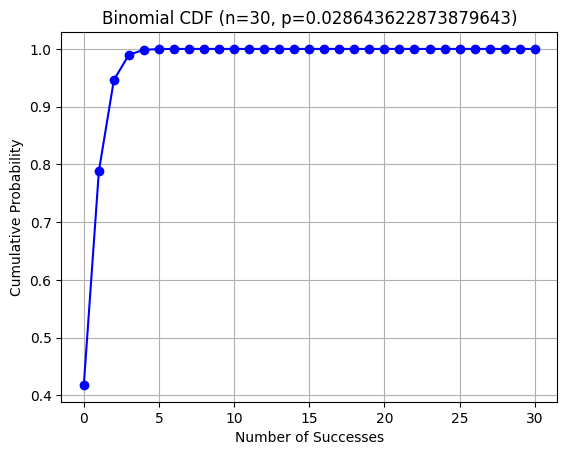

In [92]:
x = np.arange(0, N+1, 1)
cdf = binom.cdf(x, N, p*alpha)

plt.plot(x, cdf, marker='o', linestyle='-', color='b')
plt.title(f'Binomial CDF (n={N}, p={p*alpha})')
plt.xlabel('Number of Successes')
plt.ylabel('Cumulative Probability')
plt.grid()
plt.show()

### Empirical cumulative distribution function

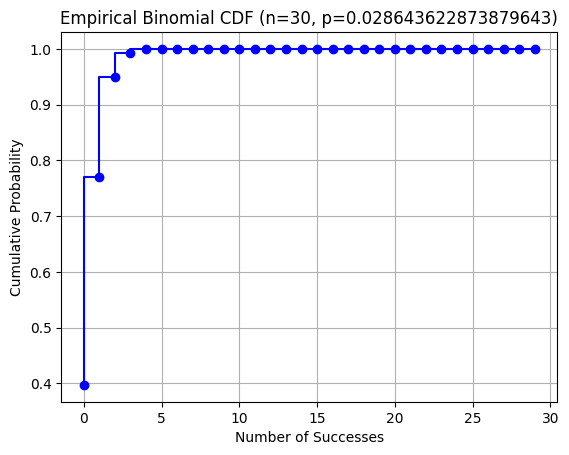

In [93]:
samples = np.random.binomial(N, p*alpha, 1000)

hist, edges = np.histogram(samples, bins=np.arange(0, N+1), density=True)
cdf = np.cumsum(hist)

plt.step(edges[:-1], cdf, marker='o', linestyle='-', color='b')
plt.title(f'Empirical Binomial CDF (n={N}, p={p*alpha})')
plt.xlabel('Number of Successes')
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.show()

# Main research

### Probability of bankruptcy

In [94]:
p_bankruptcy = binom.cdf((U + N*pi_star)/K, N, p*alpha)
print("Probability of bankruptcy:", round(1 - p_bankruptcy,4))

Probability of bankruptcy: 0.0015


In [95]:
pi = (K * binom.ppf(1-epsilon, N, p*alpha) - U)/N
print("Optimal cost of the policy (at least):", pi)

Optimal cost of the policy (at least): -233.33333333333334


In [96]:
quantile = binom.ppf(q, N, p*alpha)
print("Quantile:", quantile)

Quantile: 1.0


### Visualization

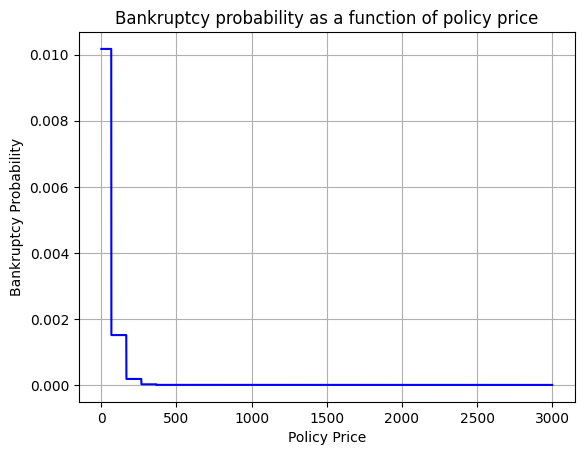

In [97]:
x_pi = [pi for pi in range(0,K+1)]
y_bankruptcy = [1-binom.cdf((U + N*pi)/K, N, p*alpha) for pi in range(0,K+1)]

plt.plot(x_pi, y_bankruptcy, linestyle='-', color='b')
plt.title('Bankruptcy probability as a function of policy price')
plt.xlabel('Policy Price')
plt.ylabel('Bankruptcy Probability')
plt.grid()
plt.show()